In [47]:
from labtools import scanner, assign_trigs_to_clicks, get_trig_len, get_dump, USER, LOC, correlation, shift_channels
from labtools import plot_style
import numpy as np
from matplotlib import pyplot as plt
import os

In [48]:
from ipywidgets import RadioButtons, Layout
from IPython.display import display
from ipywidgets import HBox, VBox
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [49]:
DATA_PATH = os.path.join(LOC['data'], "fiber_stick")

In [50]:
os.listdir(DATA_PATH)

['g2_mole01_0.dump',
 'first_try_0.dump',
 'g2_moljjm_0.dump',
 'ExpI',
 'g2_mole01_1.dump']

In [51]:
SCANS_PATH = os.path.join(DATA_PATH, "ExpI")

scans = os.listdir(SCANS_PATH)

imgs = []
for scan in scans:
    header, raw, freq = scanner.xtract(f"{SCANS_PATH}/{scan}")
    imgs.append(raw)

In [52]:
def plot_imgs(scan):
    plt.imshow(imgs[scan], aspect='auto')
    
interact(
    plot_imgs, 
    scan = widgets.RadioButtons(
    options=range(len(scans)),
    description='Scans:',
    disabled=False,
))

interactive(children=(RadioButtons(description='Scans:', options=(0, 1, 2, 3, 4, 5), value=0), Output()), _dom…

<function __main__.plot_imgs(scan)>

## Laser induced shift

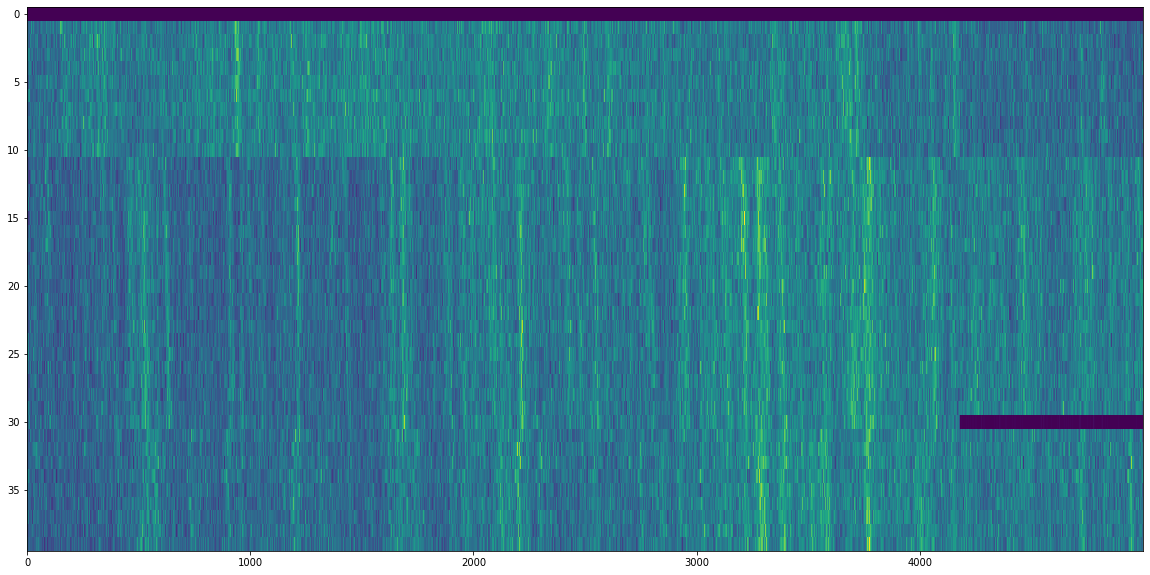

In [53]:
imgSHIFT = np.zeros(imgs[1].shape[1])

imgSHIFT1 = np.vstack((imgSHIFT, imgs[1][0:10, :]))

imgSHIFT2 = np.vstack((imgSHIFT1, imgs[1][380:400, :]))

imgSHIFT3 = np.vstack((imgSHIFT2, imgs[1][450:550, :]))

plt.figure(figsize=(20,10))
plt.imshow(imgSHIFT3[:40,:], aspect='auto')

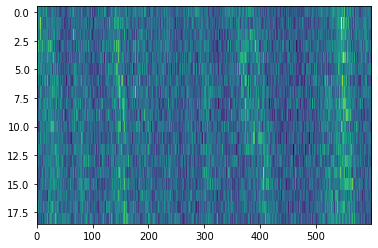

In [54]:
plt.imshow(imgSHIFT2[12:,2400:3000], aspect='auto')

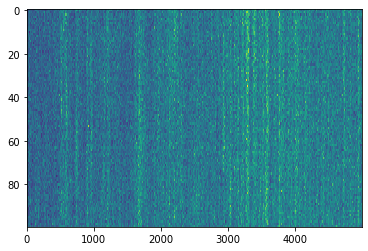

In [55]:
plt.imshow(imgs[1][450:550, :], aspect='auto')

## Narrowing with pumping

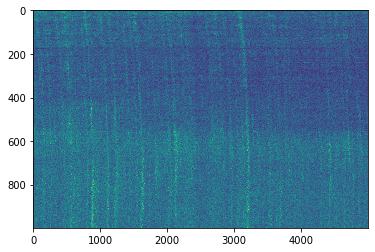

In [56]:
plt.imshow(imgs[0], aspect='auto')

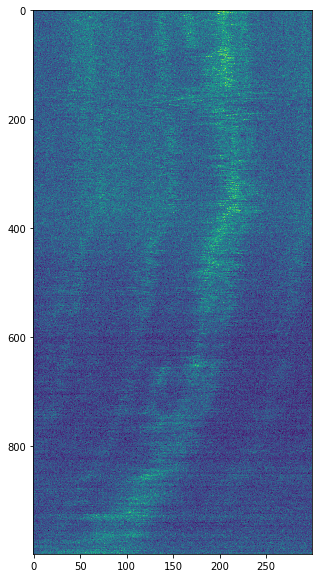

In [57]:
plt.figure(figsize=(5, 10))
plt.imshow(imgs[0][::-1,3000:3300], aspect='auto')

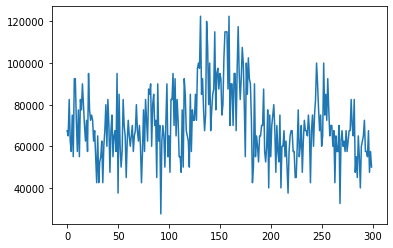

In [58]:
plt.plot(imgs[0][::-1,3000:3300][800])

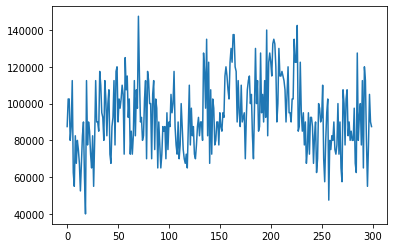

In [59]:
plt.plot(imgs[0][::-1,3000:3300][30])

## Pressure sensing

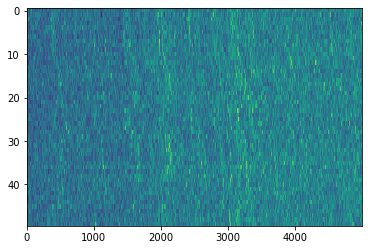

In [60]:
plt.imshow(imgs[4][20:70,:], aspect='auto')

## g2

In [61]:
DATA_PATH = os.path.join(LOC['data'], "fiber_stick")

In [62]:
dumps = [i for i in os.listdir(DATA_PATH) if 'dump' in i]

In [63]:
dump = get_dump(f'{DATA_PATH}/{dumps[2]}')

In [64]:
np.unique(dump['channel'])

array([ 1,  2,  3,  4,  5,  6,  7, 19, 20], dtype=int32)

In [65]:
corr_window = 10_000

In [66]:
autoc_diffs_tot, autoc_diffs = correlation(dump, corr_window=corr_window)

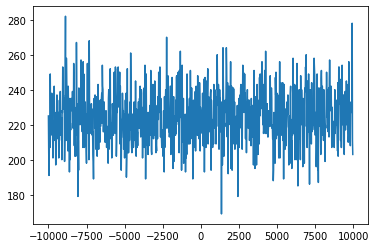

In [67]:
y, x = np.histogram(autoc_diffs_tot, bins=1000, range=(-corr_window, corr_window))
plt.plot(x[:-1], y)

In [68]:
DATA_PATH = os.path.join(LOC['data'], "pressure_shift")

In [69]:
from pathlib import Path

In [70]:
SCANS_PATH = os.path.join(DATA_PATH, "ExpI")
scans = sorted(Path(SCANS_PATH).iterdir(), key=os.path.getmtime)
imgs = []
freqs = []
for scan in scans:
    header, raw, freq = scanner.xtract(f"{scan}")
    imgs.append(raw)
    freqs.append(freq)

In [71]:
def plot_imgs(scan):
    plt.imshow(imgs[scan], aspect='auto')
    
interact(
    plot_imgs, 
    scan = widgets.RadioButtons(
    options=range(len(scans)),
    description='Scans:',
    disabled=False,
))

interactive(children=(RadioButtons(description='Scans:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…

<function __main__.plot_imgs(scan)>

In [72]:
785**4/600**4

2.93004051408179

In [78]:
import seaborn as sns

In [82]:
import pandas as pd

In [99]:
imgF.shape[1]

(184, 5000)

In [123]:
#freqsCols=[f"{np.round(f/1000, 2)} GHz" for f in freqs[6]]
freqsCols=[f"{np.round(f/1000, 2)}" for f in freqs[6]]

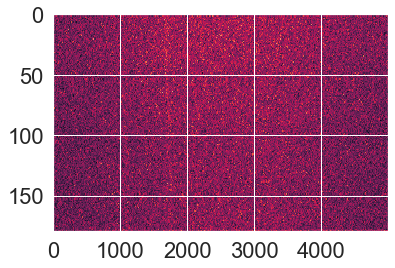

In [130]:
plt.imshow(imgs[6][:180,:], aspect='auto')

In [131]:
c = pd.DataFrame(imgs[6][:180,:]/1000, columns=freqsCols)

In [146]:
c1 = pd.DataFrame(imgs[6][:170,1500:2050]/1000, columns=freqsCols[1500:2050])

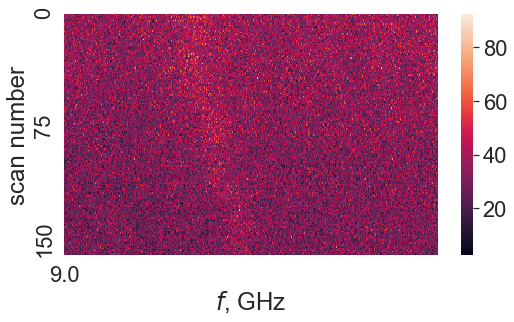

In [182]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
plt.figure(figsize=(8, 5))
sns.set(font_scale=2)
ax = sns.heatmap(c1,yticklabels=75,xticklabels=2000)
ax.set(xlabel=r'$f$, GHz', ylabel='scan number')
plt.tight_layout()
plt.savefig("fiber_traits1.png", dpi=300)


In [155]:
c2 = pd.DataFrame(imgs[6][:100,1500:2050]/1000, columns=freqsCols[1500:2050])

In [162]:
import matplotlib.ticker as plticker

<Figure size 432x288 with 0 Axes>

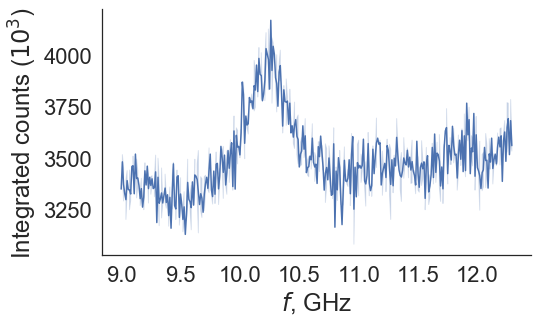

In [198]:
sns.set(font_scale=2)
sns.set_style(style="white")
sns.despine()
plt.figure(figsize=(8, 5))
sss = c2.sum(axis=0)
loc = plticker.MultipleLocator(base=50.0)
ax = sns.lineplot(data = sss)
ax.xaxis.set_major_locator(loc)
ax.set(xlabel=r'$f$, GHz', ylabel=r'Integrated counts ($10^3$)')
sns.despine()
plt.tight_layout()
plt.savefig('fiber_trairs3.png', dpi=300)

In [26]:
press = imgs[7:15]

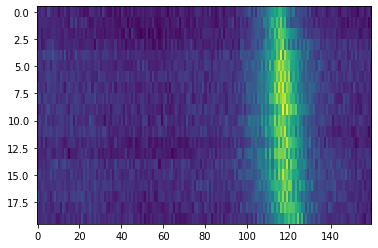

In [27]:
plt.imshow(press[7][50:70,30:], aspect='auto')

In [28]:
lines_pr0 = press[0][:,30:].sum(axis=0)
lines_pr1 = press[2][:-18,30:].sum(axis=0)
lines_pr2 = press[3][70:101,30:].sum(axis=0)
lines_pr3 = press[6][:-34,30:].sum(axis=0)
lines_pr4 = press[7][150:171,30:].sum(axis=0)
lines_pr5 = press[7][110:126,30:].sum(axis=0)
lines_pr6 = press[7][50:65,30:].sum(axis=0)

In [29]:
p = plot_style.plotting()

(<Figure size 1000x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe8685f4a90>)

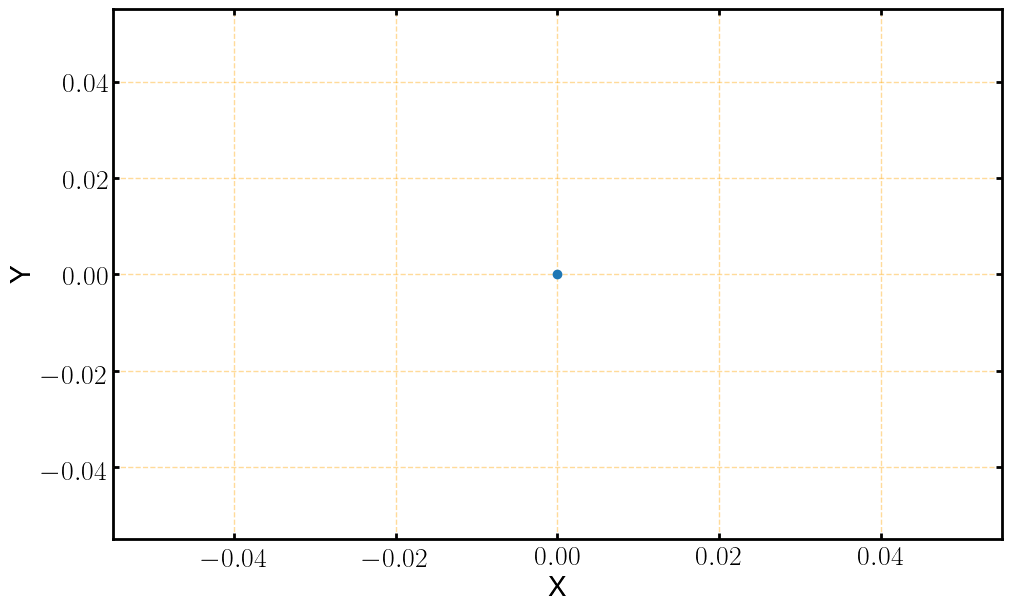

In [30]:
p.plot(0,0)

In [41]:
freq = freqs[7]

In [44]:
freq[0]

25440.222

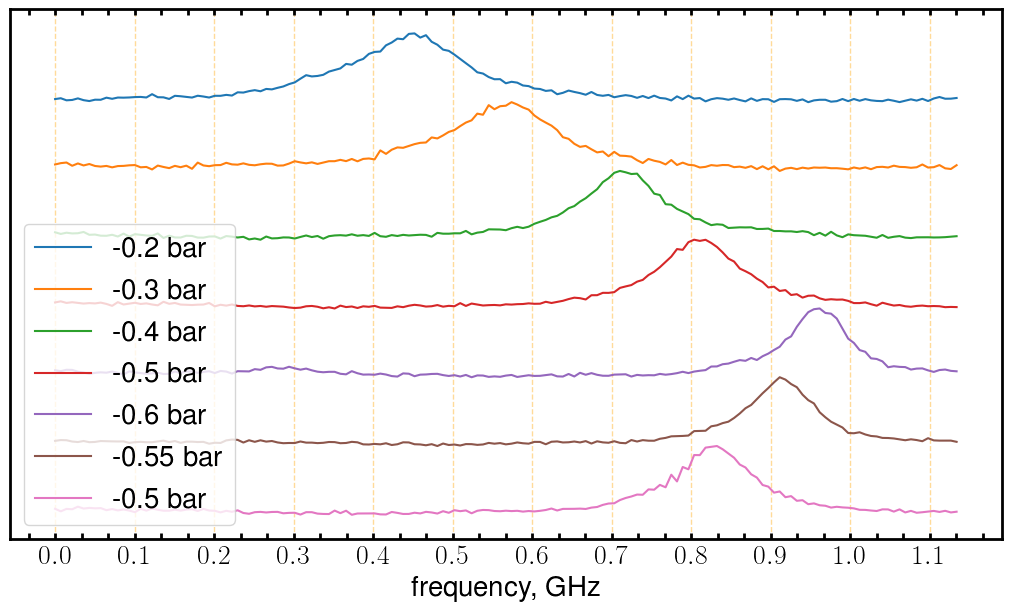

In [54]:
freq = freqs[7]

f=np.linspace(0, freq[-1] - freq[0], len(lines_pr0[1:]))/1000
l0 = (lines_pr0[1:] - min(lines_pr0[1:]))
p.plot(f, l0/max(l0) + 7, xLabel = 'frequency, GHz', line='-', tick_step_x=0.1)
l1 = lines_pr1[1:] - min(lines_pr1[1:])
plt.plot(f, l1/max(l1) + 6)
l2 = lines_pr2[1:] - min(lines_pr2[1:])
plt.plot(f, l2/max(l2) + 5)
l3 = lines_pr3[1:] - min(lines_pr3[1:])
plt.plot(f, l3/max(l3) + 4)
l4 = lines_pr4[1:] - min(lines_pr4[1:])
plt.plot(f, l4/max(l4) + 3)
l5 = lines_pr5[1:] - min(lines_pr5[1:])
plt.plot(f, l5/max(l5) + 2)
l6 = lines_pr6[1:] - min(lines_pr6[1:])
plt.plot(f, l6/max(l6) + 1)
plt.legend(['-0.2 bar', '-0.3 bar', '-0.4 bar', '-0.5 bar', '-0.6 bar', '-0.55 bar', '-0.5 bar'], loc='lower left')
plt.gca().axes.get_yaxis().set_visible(False)
plt.savefig("pressure_shift.pdf")
plt.savefig("pressure_shift.png")

## Light induced shift... 

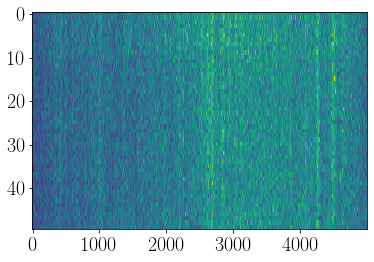

In [65]:
plt.imshow(imgs[21][150:200,:], aspect='auto')

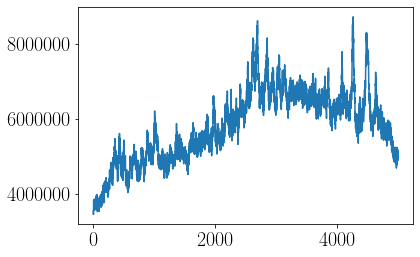

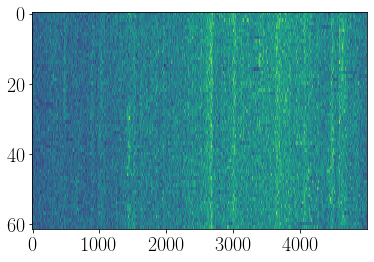

In [73]:
plt.imshow(imgs[21][470:,:], aspect='auto')

In [104]:
li1 = imgs[21][150:200,2550:].sum(axis=0)

li2 = imgs[21][470:,2550:].sum(axis=0)

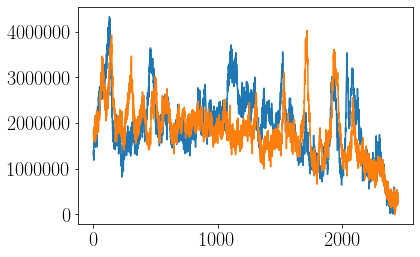

In [106]:
plt.plot(li2 - min(li2))
plt.plot(li1 - min(li1))
plt.savefig('light_shift.png')

In [ ]:
## Light induced shift... 